In [1]:
# Imports for visualization, modeling and evaluation 
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import scipy as sp
from tqdm import tqdm

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("scrap price.csv")

In [2]:
def trim(df):
    df.columns = df.columns.str.strip()
    df = df.drop_duplicates()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')
    df_obj = df.select_dtypes(['object'])
    df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
    print("All column names have been striped, lowered case, replaced space with underscore if any")
    print("Dropped duplicated instances if any")
    print("Categorical instances have been striped")
    return df
def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

def vc(df, column, r=False):
    vc_df = df.reset_index().groupby([column]).size().to_frame('count')
    vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
    vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
    print(f'STATUS: Value counts of "{column}"...')
    display(vc_df)
    if r:
        return vc_df


shape(df,'df')
df = trim(df)
display(df.head())
df.drop(['id','name'],axis=1,inplace=True)

shape(df,'df - after drop 2 col')
display(df.head())
df.info()

STATUS: Dimension of "df" = (205, 26)
All column names have been striped, lowered case, replaced space with underscore if any
Dropped duplicated instances if any
Categorical instances have been striped


,id,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


STATUS: Dimension of "df - after drop 2 col" = (205, 24)


,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltypes         205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumbers       205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheels       205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltypes         205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumbers       205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheels       205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
df.head()

In [ ]:
df.isnull().mean()*100

In [ ]:
import missingno as msno
msno.bar((df))
plt.show()

In [ ]:
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)


In [ ]:
# Looking to the target value distribuition
sns.displot(df, x="price", kde=True)

In [ ]:
sns.set_context(font_scale = 3.9)
plt.figure(figsize = (12,5))
sns.heatmap(
    df.corr(),
    annot = True,
    fmt = ".2f", 
    cmap = "RdBu", 
    mask = np.triu(np.ones_like(df.corr())) 
)

plt.show()


The features that has positive correlation with price is wheelbase, carlenght, carwidth, curbweight, enginesize, boreatio, horsepower. But we also can see multicolinearity between some features. In a regressor model, this could change way of how features are relationed to the performance of this model.

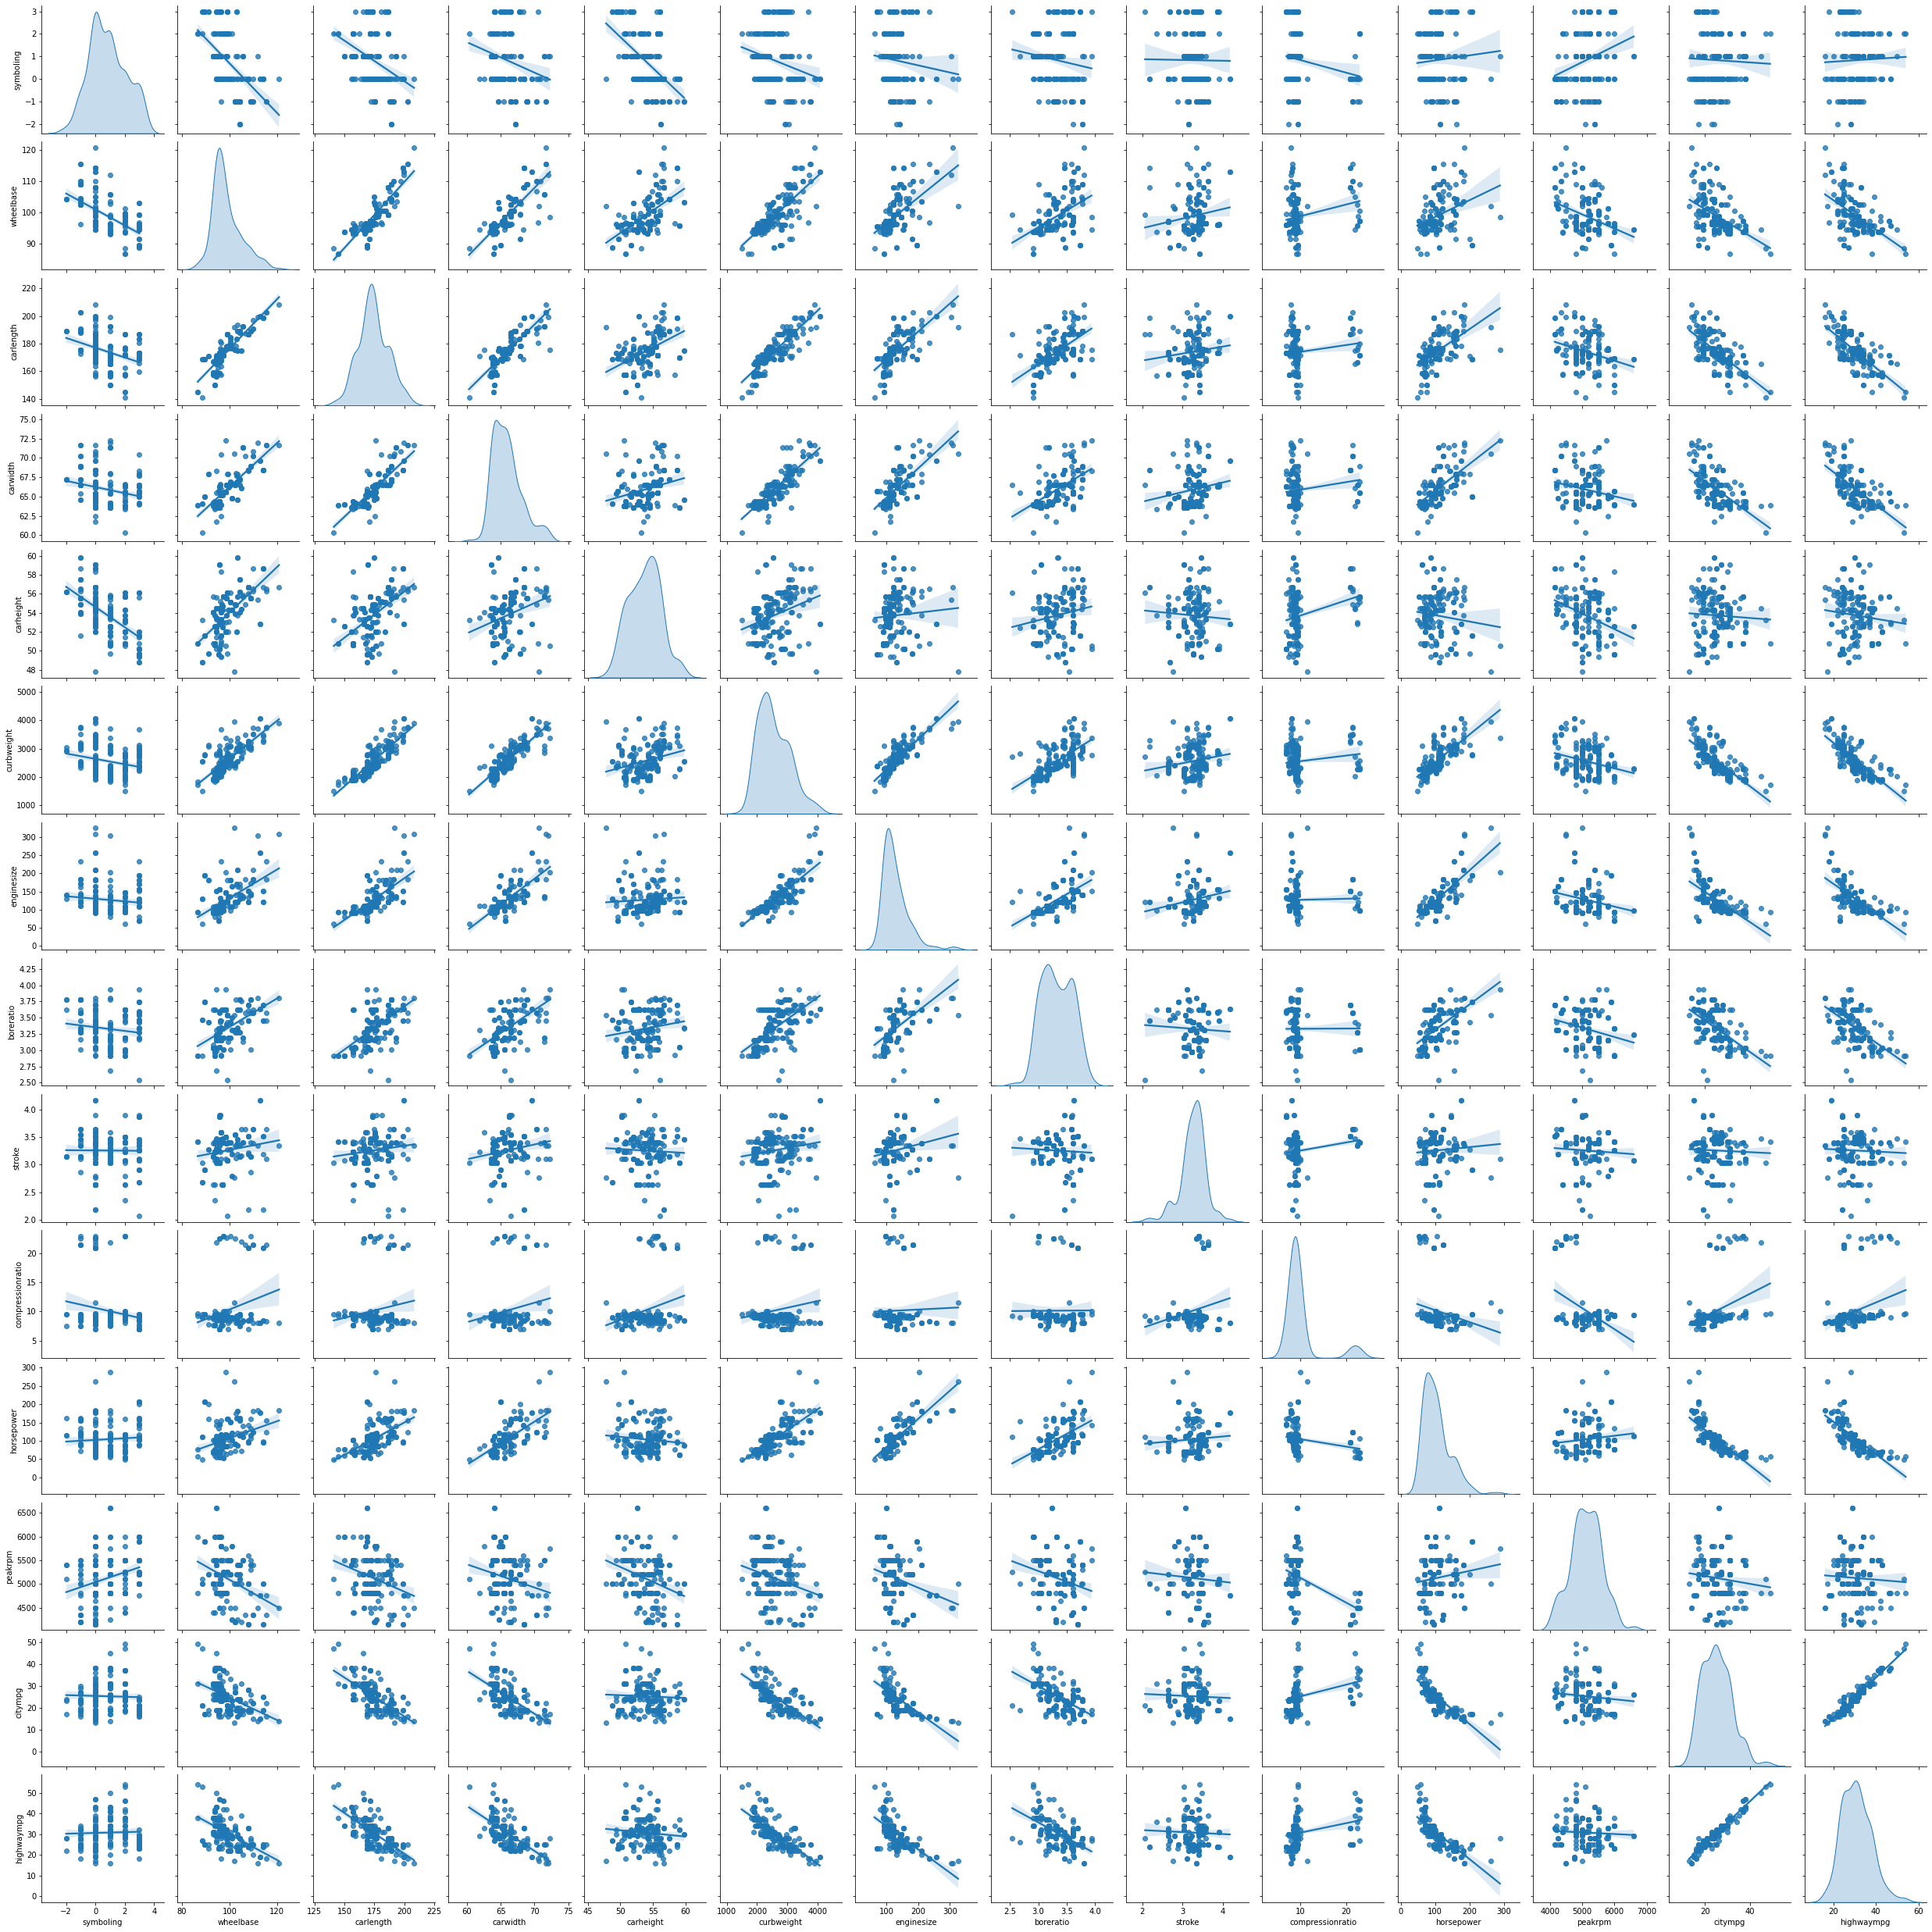

In [ ]:
X = df.drop('price', axis=1)
y = df.price.values
_ = sns.pairplot(X, kind="reg", diag_kind="kde")

In [5]:
X = df.drop('price', axis=1)
y = df.price.values

In [6]:
def get_num_cat_col(df, n):
    numerical_columns = []
    categorical_columns = []
    for col in df.columns:
        len_unique = len(df[col].unique())
        if len_unique <= n:
            categorical_columns.append(col)
        else:
            numerical_columns.append(col)
    return numerical_columns, categorical_columns

numerical_columns, categorical_columns = get_num_cat_col(X, 30)
print(f"categorical = {categorical_columns}")
print()
print(f"numerical = {numerical_columns}")
print()
X[categorical_columns].info()

categorical = ['symboling', 'fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'peakrpm', 'citympg', 'highwaympg']

numerical = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   symboling       205 non-null    int64 
 1   fueltypes       205 non-null    object
 2   aspiration      205 non-null    object
 3   doornumbers     205 non-null    object
 4   carbody         205 non-null    object
 5   drivewheels     205 non-null    object
 6   enginelocation  205 non-null    object
 7   enginetype      205 non-null    object
 8   cylindernumber  205 non-null    object
 9   fuelsystem      205 non-null    object
 10  peakrpm        

In [7]:
tuned_model = None
target_transformers = [TransformedTargetRegressor(regressor=tuned_model, 
                           func=np.log10, 
                           inverse_func=sp.special.exp10),
                       TransformedTargetRegressor(regressor=tuned_model)]

categorical_transformers = [OneHotEncoder(drop="if_binary"), 
                            OrdinalEncoder()]

scaling_transformers = [Normalizer(), 
                        StandardScaler()]

param_grid = {'target_transformers':target_transformers,
              'categorical_transformers':categorical_transformers,
              'scaling_transformers':scaling_transformers}
grid = ParameterGrid(param_grid)

for n, para in enumerate(grid, start=1):
    print(n)
    print(para)
    print()

1
{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>)}

2
{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor()}

3
{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>)}

4
{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor()}

5
{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>)}

6
{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': Norm

In [8]:
def assembling_model(categorical_transform, scale_transform,  \
                     X,  y, reg, param_distributions):
        
    preprocessor = make_column_transformer(
        (categorical_transform, categorical_columns),
        (scale_transform, numerical_columns),
    )
    
    x_transform = preprocessor.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(x_transform, y, random_state=42)
    
    search = HalvingGridSearchCV(reg, param_distributions, random_state=42)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_param = search.best_params_
    return best_model, X_train, X_test, y_train, y_test, best_param

def tuning_whole_algorithm(X,  y, reg, param_distributions, grid):
    result_list = []
    for para in tqdm(grid):
        tuned_model, X_train, X_test, y_train, y_test, parameters = assembling_model(para['categorical_transformers'], para['scaling_transformers'], \
                         X,  y, reg, param_distributions)
        
        para['target_transformers'].regressor = tuned_model
        model = para['target_transformers']
        
        model.fit(X_train, y_train)
        prediction_test = model.predict(X_test)
        model_text_list=[]; metric_list=[]; score_list=[] ; param_list=[] ; preprocessors_list=[]

        # create list of metric to be examined
        metric_functions = [r2_score, r2_score, mean_squared_error,mean_squared_error,mean_absolute_error]
        metric_functions_text = ['R_Squared', 'Adj_R_Squared', 'MSE','RMSE','MAE']

        # for loop of each of the 5 metrics
        for metric_function, metric_function_text in zip(metric_functions, metric_functions_text):
            if metric_function_text == 'Adj_R_Squared':
                Adj_r2 = 1 - (1-r2_score(y_test, prediction_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
                model_text_list.append(type(model.regressor).__name__); metric_list.append(metric_function_text); score_list.append(Adj_r2); param_list.append(parameters); preprocessors_list.append(para)
            elif metric_function_text == 'RMSE':
                rmse = mean_squared_error(y_test, prediction_test, squared=False)
                model_text_list.append(type(model.regressor).__name__); metric_list.append(metric_function_text); score_list.append(rmse); param_list.append(parameters) ; preprocessors_list.append(para)
            else:
                model_text_list.append(type(model.regressor).__name__); metric_list.append(metric_function_text); score_list.append(metric_function(y_test, prediction_test)); param_list.append(parameters) ; preprocessors_list.append(para)

        d = {'model':model_text_list,'preprocessors':preprocessors_list ,'parameters': param_list ,'metric': metric_list, 'test predict score': score_list}
        df = pd.DataFrame(data=d)
        result_list.append(df)
    df2 = pd.concat(result_list)
    return df2

In [9]:
reg = KNeighborsRegressor()

param_distributions = {'n_neighbors': [5, 7, 9, 13], 'weights': ['uniform', 'distance']}
df_result_knn = tuning_whole_algorithm(X,  y, reg, param_distributions, grid)
df_result_knn

100%|██████████| 8/8 [00:02<00:00,  3.41it/s]


,model,preprocessors,parameters,metric,test predict score
0,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",R_Squared,8.418155e-01
1,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",Adj_R_Squared,8.217148e-01
2,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",MSE,1.070269e+07
3,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",RMSE,3.271496e+03
4,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",MAE,2.142485e+03
0,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",R_Squared,8.576737e-01
1,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",Adj_R_Squared,8.395881e-01
2,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",MSE,9.629730e+06
3,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",RMSE,3.103181e+03
4,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=KNeighborsRegressor(n_neighbors=7, weights='distance'))}","{'n_neighbors': 5, 'weights': 'distance'}",MAE,2.064848e+03


In [10]:
reg = DecisionTreeRegressor(random_state=42)

param_distributions = {'max_depth': [3, 5, None],
 'min_samples_split': [2, 3, 5]}
df_result_dtr = tuning_whole_algorithm(X,  y, reg, param_distributions, grid)
df_result_dtr

100%|██████████| 8/8 [00:03<00:00,  2.04it/s]


,model,preprocessors,parameters,metric,test predict score
0,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",R_Squared,8.829122e-01
1,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",Adj_R_Squared,8.680337e-01
2,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",MSE,7.922105e+06
3,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",RMSE,2.814624e+03
4,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",MAE,2.048565e+03
0,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",R_Squared,8.106648e-01
1,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",Adj_R_Squared,7.866056e-01
2,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",MSE,1.281033e+07
3,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",RMSE,3.579153e+03
4,DecisionTreeRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=DecisionTreeRegressor(min_samples_split=5, random_state=42))}","{'max_depth': 3, 'min_samples_split': 5}",MAE,2.436078e+03


In [11]:
reg = RandomForestRegressor(random_state=42)
param_distributions = {'max_depth': [3, 5, None],
 'min_samples_split': [2, 3, 5],
 'n_estimators': [100, 300]}
df_result_rfr = tuning_whole_algorithm(X,  y, reg, param_distributions, grid)
df_result_rfr

100%|██████████| 8/8 [04:27<00:00, 33.41s/it]


,model,preprocessors,parameters,metric,test predict score
0,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",R_Squared,9.312506e-01
1,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",Adj_R_Squared,9.225145e-01
2,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",MSE,4.651551e+06
3,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",RMSE,2.156745e+03
4,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",MAE,1.498799e+03
0,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",R_Squared,9.347333e-01
1,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",Adj_R_Squared,9.264398e-01
2,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",MSE,4.415912e+06
3,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",RMSE,2.101407e+03
4,RandomForestRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",MAE,1.498898e+03


In [12]:
df_result = pd.concat([df_result_knn, df_result_dtr,df_result_rfr]).reset_index(drop=True)
df_result

,model,preprocessors,parameters,metric,test predict score
0,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'n_neighbors': 5, 'weights': 'distance'}",R_Squared,8.418155e-01
1,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'n_neighbors': 5, 'weights': 'distance'}",Adj_R_Squared,8.217148e-01
2,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'n_neighbors': 5, 'weights': 'distance'}",MSE,1.070269e+07
3,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'n_neighbors': 5, 'weights': 'distance'}",RMSE,3.271496e+03
4,KNeighborsRegressor,"{'categorical_transformers': OneHotEncoder(drop='if_binary'), 'scaling_transformers': Normalizer(), 'target_transformers': TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>, regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'n_neighbors': 5, 'weights': 'distance'}",MAE,2.142485e+03
...,...,...,...,...,...
115,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}",R_Squared,9.449688e-01
116,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}",Adj_R_Squared,9.379759e-01
117,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}",MSE,3.723384e+06
118,RandomForestRegressor,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}","{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}",RMSE,1.929607e+03


In [13]:
print("Best R2")
df_result_t = df_result[df_result.metric== 'R_Squared']
display(df_result_t.loc[df_result_t['test predict score'].idxmax()].to_frame())

print("Best Adj R2")
df_result_t = df_result[df_result.metric== 'Adj_R_Squared']
display(df_result_t.loc[df_result_t['test predict score'].idxmax()].to_frame())

print("Best MSE")
df_result_t = df_result[df_result.metric== 'MSE']
display(df_result_t.loc[df_result_t['test predict score'].idxmin()].to_frame())

print("Best RMSE")
df_result_t = df_result[df_result.metric== 'RMSE']
display(df_result_t.loc[df_result_t['test predict score'].idxmin()].to_frame())

print("Best MAE")
df_result_t = df_result[df_result.metric== 'MAE']
display(df_result_t.loc[df_result_t['test predict score'].idxmin()].to_frame())

Best R2


,115
model,RandomForestRegressor
preprocessors,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}"
parameters,"{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}"
metric,R_Squared
test predict score,0.944969


Best Adj R2


,116
model,RandomForestRegressor
preprocessors,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}"
parameters,"{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}"
metric,Adj_R_Squared
test predict score,0.937976


Best MSE


,117
model,RandomForestRegressor
preprocessors,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}"
parameters,"{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}"
metric,MSE
test predict score,3723383.589883


Best RMSE


,118
model,RandomForestRegressor
preprocessors,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}"
parameters,"{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}"
metric,RMSE
test predict score,1929.607108


Best MAE


,119
model,RandomForestRegressor
preprocessors,"{'categorical_transformers': OrdinalEncoder(), 'scaling_transformers': StandardScaler(), 'target_transformers': TransformedTargetRegressor(regressor=RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=42))}"
parameters,"{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 300}"
metric,MAE
test predict score,1252.657417
